# **DỰ ĐOÁN COVID19 QUA MÔ HÌNH MẠNG LSTM** 
## ***DỰ ĐOÁN CHUỖI THỜI GIAN VỚI MÔ HÌNH LSTM*** 
### **1. Giới thiệu**

Chuỗi các điểm dữ liệu được đo theo từng khoảng thời gian liền nhau và khoảng cách giữa các lần đo là bằng nhau, được gọi là chuỗi thời gian (time-series). Ví dụ một số chuỗi thời gian như: số lượng bệnh nhân nhiễm Covid-19 trên toàn thế giới trong mỗi ngày từ tháng 1/2020 đến hiện tại, giá cổ phiếu của công ty theo mỗi tháng qua từng năm, doanh số của ngân hàng theo các tháng trong các năm,... Bài toán chuỗi thời gian khác với các bài toán cho mô hình dự báo phân loại (classification) và hồi quy (regression). Dự đoán chuỗi thời gian là dựa trên các dữ liệu trong quá khứ và sử dụng mô hình toán học để dự đoán kết quả trong tương lai. Chúng được sử dụng rộng rãi cho dữ liệu non-stationary (dữ liệu có mean, variance, autocorrelation thay đổi theo thời gian). Bài viết sẽ trình bày về phương pháp dự đoán chuỗi thời gian theo mô hình LSTM - một dạng của mạng Recurrent Neural Network (RNN). Mạng này có ưu điểm là có thể học và ghi nhớ được các giá trị trong một chuỗi số dài và dữ liệu lớn mà không cần phải trượt qua các cửa sổ của các trễ (window lagged). LSTM rất phù hợp cho việc phân loại, xử lý và đưa ra dự đoán dựa trên dữ liệu chuỗi thời gian. 

### **2. Mô hình mạng RNN**
Một mạng nơ-ron gồm những thành phần sau:

* Đầu vào – input layer
* Tầng ẩn – hidden layers
* Đầu ra – output layer,
* Các tham số trọng lượng tương ứng W, U và sai số b
* Hàm kích hoạt cho tầng ẩn

Trong mạng nơ-ron truyền thống, giả định rằng tất cả các đầu vào và đầu ra là độc lập với nhau. Điều này gây khó khăn trong các bài toán dự đoán thực tế, ví dụ như dự đoán từ tiếp theo của câu "Hãy gọi qua số điện" thì RNN có thể đoán ra từ tiếp theo là "thoại", điều này nơ-ron truyền thống không thể thực hiện được. RRN ra đời khắc phục nhược điểm này. Mạng RNN là có một “bộ nhớ” ghi lại thông tin về những gì đã được tính toán trong quá khứ cho đến nay nhưng chúng bị hạn chế chỉ nhớ những dữ liệu gần, khả năng nắm bắt thông tin ngắn hạn.

![alt text](https://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/09/rnn.jpg)

Giải thích sơ lược qua RNN:
* $x_t$ là input đầu vào tại t
* $s_t$ là trạng thái ẩn tại t, được tính toán dựa trên cả các trạng thái ẩn phía trước và đầu vào tại t: $s_t = f(Ux_t + Ws_{t-1})$. Hàm $f$ là hàm kích hoạt
* $o_t$ là output đầu ra tại t.

### **3. Hàm kích hoạt**

Hàm kích hoạt (activation functions) là những hàm phi tuyến được áp dụng vào đầu ra của các nơ-ron trong tầng ẩn của một mô hình mạng, và được sử dụng làm đầu vào cho tầng tiếp theo. Vì các nơ-ron không tự giới hạn được giá trị của chính nó, hàm activation sẽ cho biết bao nhiêu phần của các nơ-ron được xuất ra và quyết định xem liệu nơ-ron này có nên kích hoạt hay không 

**3.1. Hàm Sigmoid (Hàm Logistic)**

Hàm phi tuyến Sigmoid $y(x)=sigmoid(x)=\frac{1}{1+ \mathbb{e}^{-x}}, \forall{x \in \mathbb{R}}$  cho ra kết quả được ràng buộc trong phạm vi giới hạn $(0,1)$ so với (-inf, inf) của hàm tuyến tính. Đầu ra của phi tuyến sigmoid $y$ có thể được xem như là một xác suất để đưa ra dự đoán. 

![alt text](https://labs.septeni-technology.jp/wp-content/uploads/2017/04/Sigmoid.jpg)
 
$\frac{dy}{dx} = $y(x)(1-y(x))$

Hàm số $sigmoid$ đạt cực trị tại -inf và +inf. Hàm số là hàm đơn điệu nhưng đạo hàm của nó thì không đơn điệu.

Giữa các giá trị $x$ trong khoảng (-4,4), giá trị lượng $y$ rất dốc, cho thấy với thay đổi nhỏ nào trong các giá trị của x trong khoảng đó sẽ khiến các giá trị của $y$ thay đổi đáng kể. Vậy nên, hàm này có sẽ đưa các kích hoạt là giá trị $y$ để dự đoán.

Với các giá trị $x$ ngoài khoảng (-4,4), quan sát trong 2 đầu của hàm Sigmoid cho thấy với sự thay đổi dù đáng kể của $x$ không khiến lượng $y$ thay đổi mấy. Điều này cũng đem lại sự bất lợi, vì khi đó gradient tại vùng đó sẽ nhỏ, dễ dàng dẫn tới hàm số đạt cực trị hay còn gọi là hàm số bão hòa. Khi hàm số đã bão hoà, việc cập nhật trọng số về sau sẽ bị ảnh hưởng rất nhiều, khiến cho mạng từ chối tiếp nhận hiểu thông tin. Hiện tượng này được gọi là **Vanishing Gradients**. Vậy nên, khi đưa dữ liệu vào mô hình mạng, dữ liệu hầu hết được tiền xử lý bằng cách chuẩn hóa các giá trị về miền [0,1], điều này có thể giảm thiểu được khả năng **Vanishing Gradients** của Sigmoid. 

**3.2 Hàm Tanh**

Hàm phi tuyến tanh $y(x)=\tanh(x)=\frac{\mathbb{e}^{x}- \mathbb{e}^{-x}}{\mathbb{e}^{x} + \mathbb{e}^{-x}}, \forall{z \in \mathbb{R}}$  cho ra kết quả được ràng buộc trong phạm vi giới hạn (-1,1). 

$y(x)=\tanh(x)=\frac{\mathbb{e}^{x}- \mathbb{e}^{-x}}{\mathbb{e}^{x} + \mathbb{e}^{-x}} = \frac{2\mathbb{e}^{x}}{\mathbb{e}^{x} + \mathbb{e}^{-x}}= 2signmoid(2x)-1$ có thể thấy rằng hàm $tanh$ là một biến đổi phép toán của hàm $sigmoid$ vì thế nó có các đặc điểm khá giống với hàm $sigmoid$. Điều đặc biệt là hàm tanh có độ dốc hơn $sigmoid$, gradient đối với $tanh$ mạnh hơn $sigmoid$ nhưng cũng bị khả năng **Vanishing Gradients**.
 
$\frac{dy}{dx}$ = $1 - \mathbb{y(x)}^{2}$

Hàm số  $tanh$  đạt cực trị tại -inf và +inf. Hàm số là hàm đơn điệu nhưng đạo hàm của nó thì không đơn điệu.

![alt text](https://upload.wikimedia.org/wikipedia/commons/d/d0/Tanh.png)


### **4. Mô hình mạng LSTM**

Mô hình LSTM - một dạng của mạng Recurrent Neural Network (RNN). Chúng khắc phục nhược điểm bộ nhớ ngắn hạn của RNN, giải quyết được vấn đề vanishing-gradient [(tham khảo tại đây)](https://medium.com/datadriveninvestor/how-do-lstm-networks-solve-the-problem-of-vanishing-gradients-a6784971a577) và có khả năng nắm bắt các phụ thuộc dài hạn tốt hơn nhiều so với RNN thông thường. LSTM được đề suất để xử lý nhiều trong nhiều bài toán thực tế.

Thành phần LSTM  gồm có một cell, với 3 tầng một ***input gate*** ***i***, một ***output gate*** ***o*** và một ***forget gate*** ***f***.

![alt text](https://i2.wp.com/nttuan8.com/wp-content/uploads/2019/06/lstm.png?resize=559%2C338&ssl=1)

Đầu vào là input trạng thái t $x_t$, trạng thái ẩn (hidden state) của trạng thái t - 1 $h_{t-1}$ và trạng thái ô (cell state) của trạng thái t - 1 $C_{t-1}$ và đầu ra là hidden state của trạng thái t $h_t$ và cell state của trạng thái t $C_t$. Khởi đầu với $h_0 = 0$ và $C_0 = 0 $, các hàm được định nghĩa như sau:

Với $W \in \mathbb{R}^{m \times n}, U \in \mathbb{R}^{m \times m}, b \in \mathbb{R}^{m}$: các ma trận hệ số và vector sai số được học trong quá trình training. Với $n$ là số chiều của $x$ và $m$ là số chiều của các vectơ kích hoạt. $\sigma$ và $tanh$ lần lượt là 2 hàm kích hoạt $sigmoid$ và $tanh$ sẽ được dùng trong phần này.
* Tầng Forget gate sẽ quyết định chọn bao nhiêu thông tin bị bỏ quên từ trạng thái trước. Thông tin được lấy từ $x_t$ và $h_{t-1}$ thông qua hàm kích hoạt $\sigma$ trả về giá trị $(0,1)$.

$f_t = \sigma(U_f*x_t + W_f*h_{t-1} + b_f)$

![alt text](https://miro.medium.com/proxy/1*GjehOa513_BgpDDP6Vkw2Q.gif)


* Tiếp theo quyết định thông tin mới được lưu lại ở đầu vào trạng thái hiện tại. Tầng Input gate sẽ đưa thông tin state và hidden state của layer trước qua 2 hàm: sử dụng hàm kích hoạt $\sigma$ trả về giá trị $(0,1)$ để quyết định giá trị nào sẽ cập nhật và hàm kích hoạt $tanh$ tạo vecto $\tilde{C_t}$ mới có giá trị $(-1,1)$ để thêm vào trạng thái.

$i_t = \sigma(U_i*x_t + W_i*h_{t-1} + b_i)$

$\tilde{C_t}= tanh(U_c*x_t + W_c*h_t + b_c)$

![alt text](https://miro.medium.com/proxy/1*TTmYy7Sy8uUXxUXfzmoKbA.gif)

* Tiếp theo là cập nhật cell state mới $C_t$ từ các thông tin bị bỏ quên ở cell state trước $f_t*C_{t-1}$ và thông tin mới được cập nhật ở đầu vào $i_t*\tilde{C_t}$.

$C_t = \sigma(f_t*C_{t-1} + i_t*\tilde{C_t})$

![alt text](https://miro.medium.com/proxy/1*S0rXIeO_VoUVOyrYHckUWg.gif)

* Tầng Output quyết định thông tin đầu ra của trạng thái hiện tại. Tầng Output gate sẽ sử dụng hàm kích hoạt $\sigma$ trả về giá trị $(0,1)$ để quyết định chọn bao nhiêu thông tin trạng thái sẽ được xuất ra. Trạng thái mới $C_t$ qua hàm tanh để trả về giá trị $(-1,1)$. Kết hợp 2 giá trị để trở thành output cho trạng thái ẩn. Kết quả đầu ra đó (hidden state) và cả cell state sẽ được đưa vào bước tiếp theo.

$o_t = \sigma(U_o*x_t + W_o*h_{t-1} + b_o)$

$h_t = tanh(C_t)*o_t$

![alt text](https://miro.medium.com/proxy/1*VOXRGhOShoWWks6ouoDN3Q.gif)

### **5. Dữ liệu**

**5.1. Dữ liệu time_series_covid19_recovered_global.**

Dữ liệu ban đầu được lấy từ *time_series_covid19_recovered_global* miêu tả số bệnh nhân đã được phục hồi bệnh Covid19 từ 22-1-2020 đến 31-7-2020 ở các nước cụ thể trên thế giới. Dữ liệu mình đem đi phân tích là tổng các số bệnh nhân đó trong chuỗi thời gian từ 22-1-2020 đến 31-7-2020. Dữ liệu có thể được download tại [time_series_covid19_recovered_global](https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases/resource/534cd42b-2e29-447f-82f2-d2f68e5955a3)

In [60]:
import pandas as pd
link ='https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv'
data = pd.read_csv(link, header=0)
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254,21454,22456,22824,23151,23273,23634,23741,23741,23924,24550,24602,24793,25180,25198,25358,25389,25471,25509,25509,25510,25669,25669,25742,25840,25903
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1438,1459,1516,1559,1592,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014,2062,2091,2137,2214,2264,2311,2352,2397,2463,2523,2608,2637,2682,2745,2789,2830,2883,2952,2961,3018,3031,3031,3123,3155,3227
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9674,9897,10040,10342,10832,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019,14295,14792,15107,15430,15744,16051,16400,16646,16983,17369,17369,18076,18088,18837,19233,19592,20082,20537,20988,21419,21901,22375,22802,23238,23667
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,799,799,799,800,800,800,800,800,800,802,802,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,803,804,806,807,807,807,821,825,825,828,839
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,93,93,97,97,107,108,108,108,117,117,117,117,118,118,118,118,124,124,199,210,221,221,221,221,236,241,242,242,242,266,301,395,437,460,461,476,503,506,520,544


Dữ liệu trên là số người đã phục hồi bệnh Covid19 qua các nước. Để đánh giá chung sự chuyển động của bệnh qua các nước như thế nào. Tiếp theo, ta sẽ tạo một chuỗi thời gian về tổng số các người bệnh Covid-19 được phục hồi bệnh trên toàn thế giới'

In [121]:
import datetime
date = [i for i in data.columns[4:]]
sum_of_global = [sum(data[i]) for i in data.columns[4:]]
series = pd.DataFrame(sum_of_global, columns=['Number'], index=date)
series.index = pd.to_datetime(series.index.str.split().str[0], format='%m/%d/%y')
print('Chuỗi thời gian về tổng số các người bệnh Covid-19 được phục hồi bệnh trên toàn thế giới')
series

Chuỗi thời gian về tổng số các người bệnh Covid-19 được phục hồi bệnh trên toàn thế giới


,Number
2020-01-22,28
2020-01-23,30
2020-01-24,36
2020-01-25,39
2020-01-26,52
...,...
2020-08-03,10913000
2020-08-04,11134735
2020-08-05,11356275
2020-08-06,11545401


Thuộc tính **Number** bên dưới là số lượng các người bệnh Covid-19 được phục hồi bệnh trên toàn thế giới **biến động mỗi ngày**. 

In [122]:
series.Number=series-series.shift()
series = series.dropna()
print('Chuỗi thời gian về số các người bệnh Covid-19 được phục hồi bệnh trên toàn thế giới dao động mỗi ngày')
series

Chuỗi thời gian về số các người bệnh Covid-19 được phục hồi bệnh trên toàn thế giới dao động mỗi ngày


,Number
2020-01-23,2.0
2020-01-24,6.0
2020-01-25,3.0
2020-01-26,13.0
2020-01-27,9.0
...,...
2020-08-03,222445.0
2020-08-04,221735.0
2020-08-05,221540.0
2020-08-06,189126.0


Chuỗi dữ liệu biến động theo thời gian như sau


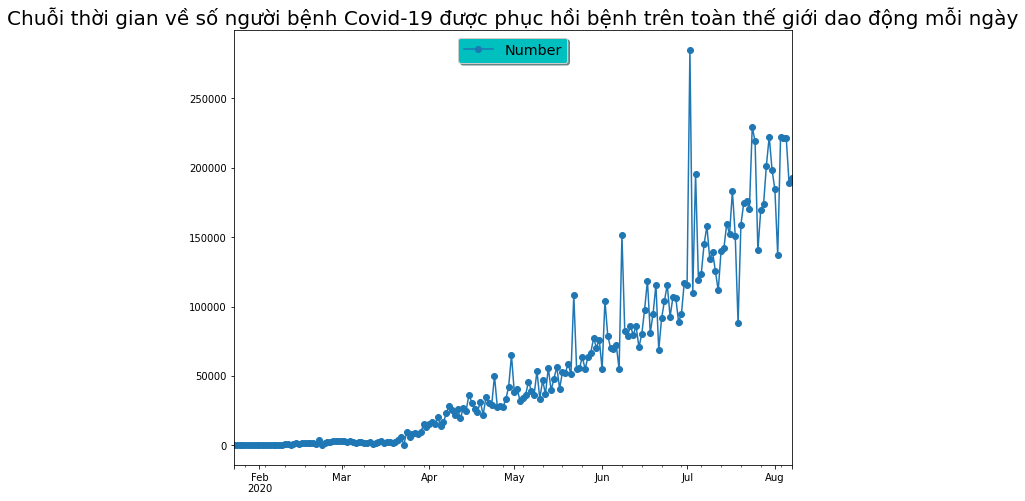

In [123]:
import numpy as np
import matplotlib.pyplot as plt
series.plot(figsize = (10,8), style = 'o-', label = 'Y')
plt.title('Chuỗi thời gian về số người bệnh Covid-19 được phục hồi bệnh trên toàn thế giới dao động mỗi ngày', fontsize=20)
legend = plt.legend(loc = 'upper center', shadow = True, fontsize = 'x-large')
legend.get_frame().set_facecolor('C')

Quan sát ta có thấy dữ liệu trên nó biến đổi một cách khó xác định, và bằng mắt thường chúng ta nhìn thì thấy nó chẳng có quy luật nào cả. Nhưng LSTM có thể dự đoán được các dữ liệu trong tương lai một cách 80-90%. 

Biểu đồ Histogram bên dưới cho thấy phân phối tần suất của dữ liệu. Dữ liệu 
người phục hồi Covid19 tính từ 22-1-2020 đến 31-7-2020 **biến động mỗi ngày** nằm trong khoảng 2-284877 (người). Giá trị của phân phối tần suất giảm dần theo độ lớn của **Number**, phương sai tương đối lớn do ảnh hưởng của việc trend tăng và bản chất ngẫu nhiên của dữ liệu khá cao.



              Number
count     198.000000
mean    59282.318182
std     64547.205395
min         2.000000
25%      2696.500000
50%     36545.000000
75%     94138.500000
max    284877.000000


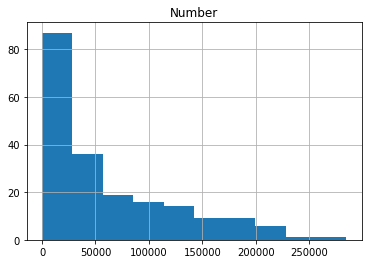

In [124]:
series.hist()
print(series.describe())

LSTM là một loại mạng thần kinh thường xuyên có khả năng ghi nhớ thông tin quá khứ và đưa dự đoán các giá trị tương lai, vì thế nó cần dữ liệu trong quá khứ. Để chuẩn bị dữ liệu cho LSTM, tạo dữ liệu bằng cách tạo trễ của dữ liệu thông qua độ trễ (look_back), độ trễ chính là số bước thời gian trước được sử dụng làm biến đầu vào để dự đoán khoảng thời gian tiếp theo, trong trường hợp này mặc định là 1. Mục tiêu của chúng ta là tạo ra một tập dữ liệu trong đó X là số lượng người tại một thời điểm nhất định t và Y là số lượng hành khách tại lần tiếp theo t + 1. Phần **Xi** là dữ liệu quá khứ, phần **y** là dữ liệu của hiện tại. Bài toán đặt ra là dùng dữ liệu quá khứ để dự đoán giá trị hiện tại, và tương lai.

In [125]:
def create_data(data, look_back):
    data_frame = data
    cols = ['X']
    for i in range(look_back):
        data_frame = pd.merge(data_frame, data.shift(i+1), how = 'left', left_index = True, right_index = True)
        cols.append('X%s'%(i+1))
    data_frame.columns = cols
    data_frame=data_frame.rename(columns = {'X':'y'})
    return data_frame.iloc[look_back:, :]

In [126]:
look_back =1
data_series = create_data(series, 1)
data_series

,y,X1
2020-01-24,6.0,2.0
2020-01-25,3.0,6.0
2020-01-26,13.0,3.0
2020-01-27,9.0,13.0
2020-01-28,46.0,9.0
...,...,...
2020-08-03,222445.0,136970.0
2020-08-04,221735.0,222445.0
2020-08-05,221540.0,221735.0
2020-08-06,189126.0,221540.0


LSTM có khả năng ghi nhớ cao nhưng cũng rất nhạy cảm với cấu trúc của dữ liệu đầu vào vì sự phân tán và phạm vi rất rộng của dữ liệu thô gây , đặc biệt khi các hàm activation sigmoid hoặc tanh được sử dụng. Mô hình mạng sẽ được tối ưu và huấn luyện tốt nếu dữ liệu được co giãn phạm vi bằng việc được chuẩn hóa trong (0,1). 

In [127]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

scaler = MinMaxScaler(feature_range = (0, 1))
data_series_scaler = scaler.fit_transform(data_series)

Tiếp theo, chia train và test của chuỗi, dữ liệu train dùng để huấn luyện mô hình và test dùn để đánh giá mô hình dự đoán. Dữ liệu chuỗi thời gian khi chia train và test điều chú ý là phải giữ lại thứ tự các quan sát, vì thế ta chọn 0.7 các quan sát phần đầu cho dữ liệu train để xây dựng mô hình và 0.3 còn lại cho dữ liệu test thay vì chọn ngẫu nhiên.

In [128]:
train_size = int(data_series.shape[0]*0.7)
test_size = data_series.shape[0] - train_size
train, test = data_series_scaler[0:train_size, :], data_series_scaler[train_size:data_series.shape[0], :]
print('Kích thước Train:',train.shape)
print('Kích thước Test:',test.shape)

Kích thước Train: (137, 2)
Kích thước Test: (60, 2)


Tạo ra train và test cho X, y. Đồng thời reshape dữ liệu đầu vào LSTM theo dạng (samples, time_steps, features)  

In [129]:
trainX, trainY = train[:, 1:], train[:, 0]
testX, testY = test[:, 1:], test[:, 0]
# reshape input to be [samples, time steps, features]
trainX = trainX.reshape(trainX.shape[0], 1, trainX.shape[1])
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])

Xây dựng mạng LSTM đầu tiên là khởi tạo lớp mô hình Sequential và thêm các lớp LSTM, Dropout và Dense cho mô hình này. Cuối cùng ta cho qua một tầng kết nối Dense với đầu ra là 1 chiều. epochs là số lượng phiên cập nhật trên toàn bộ dữ liệu, batch_size là lượng quan sát được sử dụng trong 1 phiên cập nhật, khai báo tham số shuffle là False nhằm vô hiệu hóa xáo trộn mẫu cho chuỗi thời gian và verbose = 0 để ẩn quá trình chạy model. Hàm mất mát được sử dụng trong mạng neuron này là mean_squared_error cập nhật bởi thuật toán Adam. 

In [237]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(5, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 500, batch_size = 30, verbose = 0, shuffle = False)

Sau khi huấn luyện mô hình, chúng ta sẽ thử đem vào mô hình bộ **trainX** để kiểm tra độ ghi nhớ "siêu đẳng" của LSTM và **testX** để đánh giá khả năng dự đoán "thần kì" của LSTM sẽ như thế nào.

In [238]:
# Make prediction
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

Sau khi dự đoán xong thì chúng ta thực hiện inverse transform **trainX** và **testX** để đưa về kết quả thực vì trước đã chuẩn hóa chúng nằm trong (0,1). Đồng thời, đưa ra sai số RMSE giữa kết quả thực tế và dự đoán.

In [239]:
import math
# Invert prediction
trainPredictInv = scaler.inverse_transform(np.concatenate((trainPredict, trainX.reshape(trainX.shape[0], -1)), axis = 1))[:, 0]
trainYInv = data_series.iloc[:train_size, 0].values
testPredictInv = scaler.inverse_transform(np.concatenate((testPredict, testX.reshape(testX.shape[0], -1)), axis = 1))[:, 0]
testYInv = data_series.iloc[train_size:, 0].values
#Mse
mse_train = math.sqrt(mean_squared_error(trainYInv[:-1], trainPredictInv[1:]))
mse_test = math.sqrt(mean_squared_error(testYInv[:-1], testPredictInv[1:]))
print('Train MSE: %s' %mse_train)
print('Test MSE: %s' %mse_test)

Train MSE: 2708.929719124169
Test MSE: 4120.901244421174


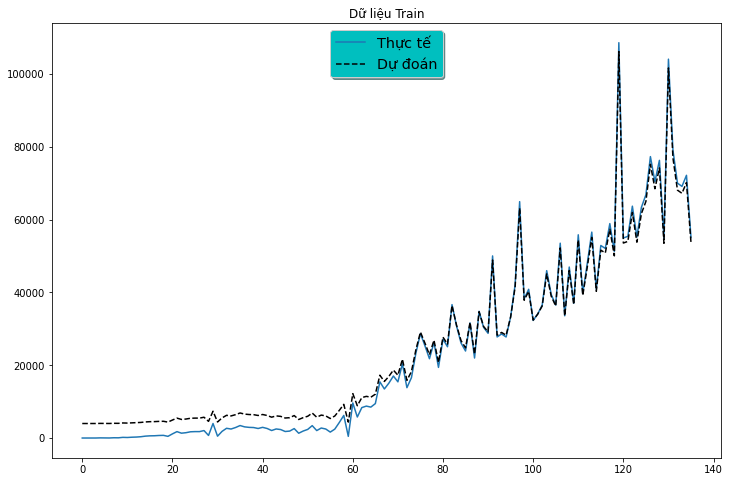

In [240]:
plt.figure(figsize = (12, 8))
plt.plot(trainYInv[:-1], label = 'Thực tế')
plt.plot(trainPredictInv[1:], 'k--', label = 'Dự đoán')
plt.title('Dữ liệu Train')
legend = plt.legend(loc = 'upper center', shadow = True, fontsize = 'x-large')
legend.get_frame().set_facecolor('C')

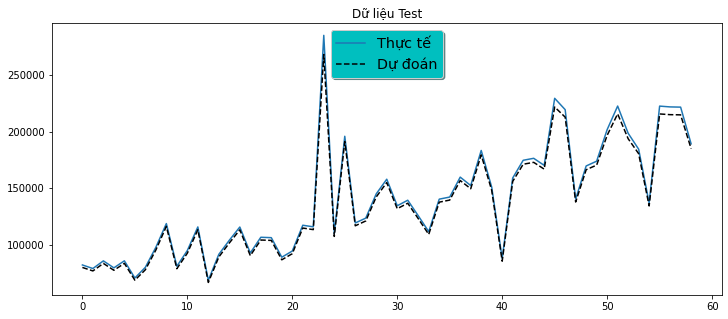

In [241]:
plt.figure(figsize = (12, 5))
plt.plot(testYInv[:-1], label = 'Thực tế')
plt.plot(testPredictInv[1:], 'k--', label = 'Dự đoán')
plt.title('Dữ liệu Test')
legend = plt.legend(loc = 'upper center', shadow = True, fontsize = 'x-large')
legend.get_frame().set_facecolor('C')

Quan sát, dữ liệu dự đoán khá khớp với dữ liệu thực tế testX. Tiếp theo là dự đoán giá trị tương lai. Với n_pred ngày kế tiếp, thì số bệnh nhân phục hồi bệnh Covid sẽ ước lượng là bao nhiêu 

    Ngày  Giá trị dự đoán
0      8    134514.000000
1      9    139392.000000
2     10    125709.000000
3     11    111679.000000
4     12    140344.000000
5     13    142200.000000
6     14    159781.000000
7     15    152370.000000
8     16    183310.000000
9     17    150957.000000
10    18     87877.000000
11    19    158996.000000
12    20    174647.000000
13    21    176387.000000
14    22    170164.000000
15    23    229317.000000
16    24    219317.000000
17    25    140476.000000
18    26    169623.000000
19    27    173854.000000
20    28    201690.000000
21    29    222487.000000
22    30    198490.000000
23    31    184445.000000
24    32    136970.000000
25    33    222445.000000
26    34    221735.000000
27    35    221540.000000
28    36    189126.000000
29    37    192526.000000
30    38    188116.123014


Text(0.5, 1.0, 'Dự đoán số người phục hồi bệnh Covid19 trên toàn thế giới dao động trong 31 ngày kế tiếp')

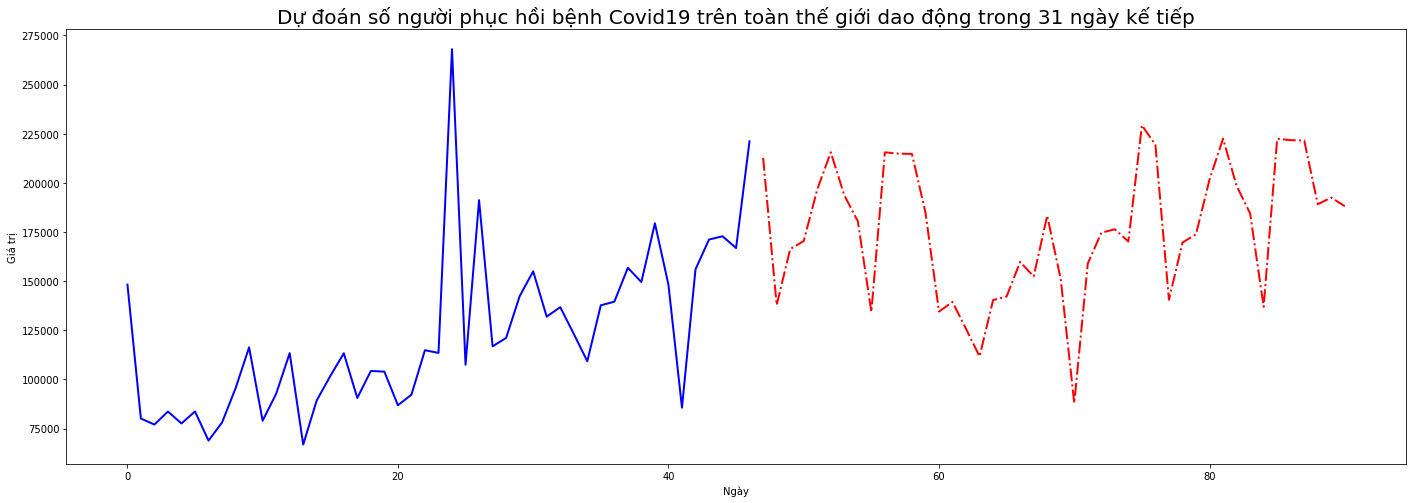

In [242]:
import matplotlib.collections as ml
n_predict=31
look_back=1
for i in range(n_predict):
    forecastY = testY.reshape(-1, 1)
    Ypredict = model.predict(forecastY[-look_back:].reshape(1,1,look_back))
    forecastY = np.concatenate((forecastY, Ypredict), axis = 0)
forecastY = forecastY[-(n_pred+look_back+1):]
inversePredict = [forecastY[-(n_predict+i):] if i == 0 else forecastY[-(n_predict+i):-i] for i in range(look_back+1)]
inversePredict = np.concatenate(inversePredict, axis = 1)
Ypredict = scaler.inverse_transform(inversePredict)[:, 0]

date_predict=[i for i in range(data_series[train_size:].index[-1].day+1,data_series[train_size:].index[-1].day+n_predict+1)]
series = pd.DataFrame(data={'Ngày':date_predict,'Giá trị dự đoán':Ypredict})
print(series)

Ymerge = np.concatenate((testPredictInv, Ypredict))
Ygraph = np.concatenate((np.arange(Ymerge.shape[0]).reshape(Ymerge.shape[0], -1), Ymerge.reshape(Ymerge.shape[0], -1)), axis = 1)
fig, ax = plt.subplots(figsize = (24, 8))
line_segments = ml.LineCollection([Ygraph[:47], Ygraph[47:]], colors = ['b', 'r'], linestyle = ['solid', 'dashdot'], linewidth = 2)
ax.add_collection(line_segments)
ax.autoscale()
ax.set_ylabel('Giá trị')
ax.set_xlabel('Ngày')

plt.title('Dự đoán số người phục hồi bệnh Covid19 trên toàn thế giới dao động trong %d ngày kế tiếp'%Ypredict.shape[0], fontsize = 20)    

**5.2 Dữ liệu time_series_covid19_confirmed_global.csv**

Tuy nhiên dữ liệu như trên, bằng nhiều cách đơn giản hơn, y học có thể kiểm soát được sự biến động dữ liệu và đưa dự doán. Để minh chứng công dụng time series sẽ phục vụ cho việc Bussiness như thế nào, phần tiếp theo sẽ dự đoán số người mắc bệnh Covid19 cho toàn cầu biến động qua mỗi ngày dựa trên dữ liệu [time_series_covid19_confirmed_global.csv](https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases/resource/00fa0e37-961b-4767-a5ce-e7ab4e2c921c) có số người bệnh Covid gia tăng đột ngột, ngẫu nhiên.

Tương tự như phân tích trên:

Chuỗi thời gian về tổng số các người bệnh Covid-19 trên toàn thế giới
    Province/State         Country/Region        Lat  ...  8/5/20  8/6/20  8/7/20
0              NaN            Afghanistan  33.939110  ...   36829   36896   37015
1              NaN                Albania  41.153300  ...    5889    6016    6151
2              NaN                Algeria  28.033900  ...   33055   33626   34155
3              NaN                Andorra  42.506300  ...     939     944     955
4              NaN                 Angola -11.202700  ...    1395    1483    1538
..             ...                    ...        ...  ...     ...     ...     ...
261            NaN  Sao Tome and Principe   0.186400  ...     878     878     878
262            NaN                  Yemen  15.552727  ...    1763    1768    1796
263            NaN                Comoros -11.645500  ...     388     396     396
264            NaN             Tajikistan  38.861000  ...    7625    7665    7706
265            NaN          

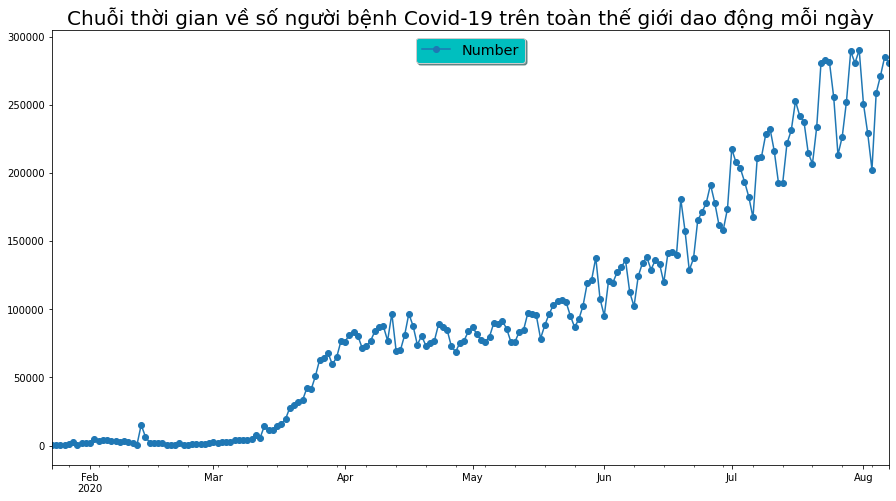

In [263]:
import pandas as pd
import datetime
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#create data
link = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv'
data_confirmed = pd.read_csv(link, header=0)
print('Chuỗi thời gian về tổng số các người bệnh Covid-19 trên toàn thế giới')
print(data_confirmed )
date = [i for i in data_confirmed.columns[4:]]
sum_of_global = [sum(data_confirmed[i]) for i in data_confirmed.columns[4:]]
series_confirmed = pd.DataFrame(sum_of_global, columns=['Number'], index=date)
series_confirmed.index = pd.to_datetime(series_confirmed.index.str.split().str[0], format='%m/%d/%y')
series_confirmed.Number=series_confirmed-series_confirmed.shift()
series_confirmed = series_confirmed.dropna()
print('Chuỗi thời gian về số người bệnh Covid-19 trên toàn thế giới dao động mỗi ngày')
print(series_confirmed)
#data_description
series_confirmed.plot(figsize = (15,8), style = 'o-', label = 'Y')
plt.title('Chuỗi thời gian về số người bệnh Covid-19 trên toàn thế giới dao động mỗi ngày', fontsize=20)
legend = plt.legend(loc = 'upper center', shadow = True, fontsize = 'x-large')
legend.get_frame().set_facecolor('C')
print('Thống kê mô tả')
print(series_confirmed.describe())
#creat_series_shift
look_back = 1
data_series_confirmed = create_data(series_confirmed, 1)
scaler = MinMaxScaler(feature_range = (0, 1))
data_series_scaler_confirmed = scaler.fit_transform(data_series_confirmed)
#split into train and test sets
train_size_confirmed = int(data_series_confirmed.shape[0]*0.7)
test_size_confirmed = data_series_confirmed.shape[0] - train_size_confirmed
train_confirmed, test_confirmed = data_series_scaler_confirmed[0:train_size_confirmed, :], data_series_scaler_confirmed[train_size_confirmed:data_series_confirmed.shape[0], :]
#print('Kích thước Train:',train_confirmed.shape)
#print('Kích thước Test:',test_confirmed.shape)
trainX_confirmed, trainY_confirmed = train_confirmed[:, 1:], train_confirmed[:, 0]
testX_confirmed, testY_confirmed = test_confirmed[:, 1:], test_confirmed[:, 0]
# reshape input to be [samples, time steps, features]
trainX_confirmed = trainX_confirmed.reshape(trainX_confirmed.shape[0], 1, trainX_confirmed.shape[1])
testX_confirmed = testX_confirmed.reshape(testX_confirmed.shape[0], 1, testX_confirmed.shape[1])

* Xây dựng mô hình LSTM

In [270]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(5, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX_confirmed, trainY_confirmed, epochs = 500, batch_size = 25, verbose = 0, shuffle = False)


* Kiểm tra mô hình

Train MSE: 1521.3280875935598
Test MSE: 1859.4451107083858
Kích thước Train: 137
Kích thước Test: 137


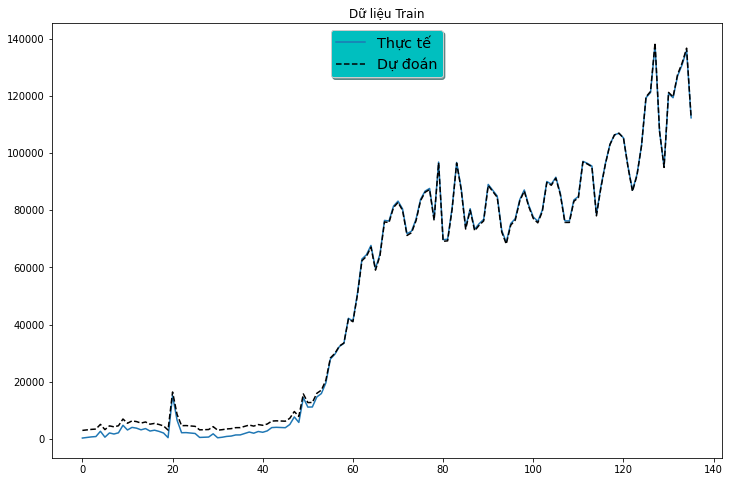

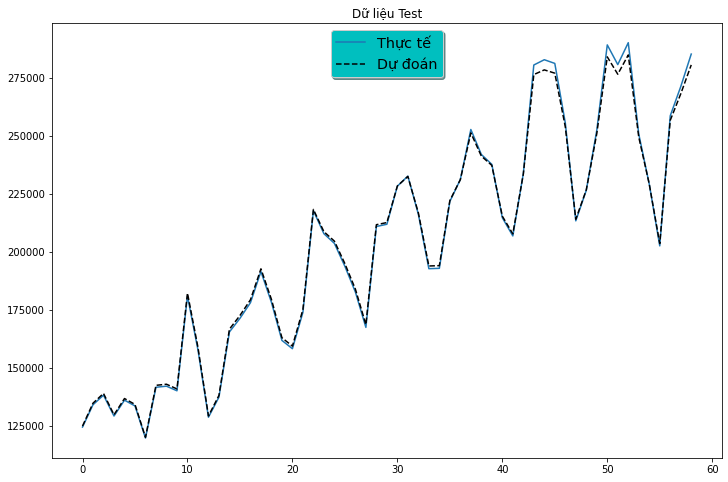

In [271]:
# Make prediction
trainPredict_confirmed = model.predict(trainX_confirmed)
testPredict_confirmed = model.predict(testX_confirmed)
# Invert prediction
trainPredictInv_confirmed = scaler.inverse_transform(np.concatenate((trainPredict_confirmed, trainX_confirmed.reshape(trainX_confirmed.shape[0], -1)), axis = 1))[:, 0]
trainYInv_confirmed = data_series_confirmed.iloc[:train_size_confirmed, 0].values
testPredictInv_confirmed = scaler.inverse_transform(np.concatenate((testPredict_confirmed, testX_confirmed.reshape(testX_confirmed.shape[0], -1)), axis = 1))[:, 0]
testYInv_confirmed = data_series_confirmed.iloc[train_size_confirmed:, 0].values
#Calculate MSE
mse_train_confirmed = math.sqrt(mean_squared_error(trainYInv_confirmed[:-1], trainPredictInv_confirmed[1:]))
mse_test_confirmed = math.sqrt(mean_squared_error(testYInv_confirmed[:-1], testPredictInv_confirmed[1:]))
print('Train MSE: %s' %mse_train_confirmed)
print('Test MSE: %s' %mse_test_confirmed)
#Draw train
print('Kích thước Train:',train_size_confirmed)
plt.figure(figsize = (12, 8))
plt.plot(trainYInv_confirmed[:-1], label = 'Thực tế')
plt.plot(trainPredictInv_confirmed[1:], 'k--', label = 'Dự đoán')
plt.title('Dữ liệu Train')
legend = plt.legend(loc = 'upper center', shadow = True, fontsize = 'x-large')
legend.get_frame().set_facecolor('C')
#Draw test
print('Kích thước Test:',train_size_confirmed)
plt.figure(figsize = (12, 8))
plt.plot(testYInv_confirmed[:-1], label = 'Thực tế')
plt.plot(testPredictInv_confirmed[1:], 'k--', label = 'Dự đoán')
plt.title('Dữ liệu Test')
legend = plt.legend(loc = 'upper center', shadow = True, fontsize = 'x-large')
legend.get_frame().set_facecolor('C')

* Dự đoán giá trị trong *n_predict* ngày kế tiếp

    Ngày  Giá trị dự đoán
0      8    228227.000000
1      9    232577.000000
2     10    216125.000000
3     11    192655.000000
4     12    192808.000000
5     13    221639.000000
6     14    231119.000000
7     15    252673.000000
8     16    241907.000000
9     17    237635.000000
10    18    214647.000000
11    19    206778.000000
12    20    233623.000000
13    21    280479.000000
14    22    282756.000000
15    23    281165.000000
16    24    255545.000000
17    25    213280.000000
18    26    226454.000000
19    27    252337.000000
20    28    289149.000000
21    29    280650.000000
22    30    290100.000000
23    31    250712.000000
24    32    229106.000000
25    33    202485.000000
26    34    258581.000000
27    35    271164.000000
28    36    285196.000000
29    37    280887.000000
30    38    276708.693966


Text(0.5, 1.0, 'Dự đoán số người mắc bệnh Covid19 trên toàn thế giới dao động trong 31 ngày kế tiếp')

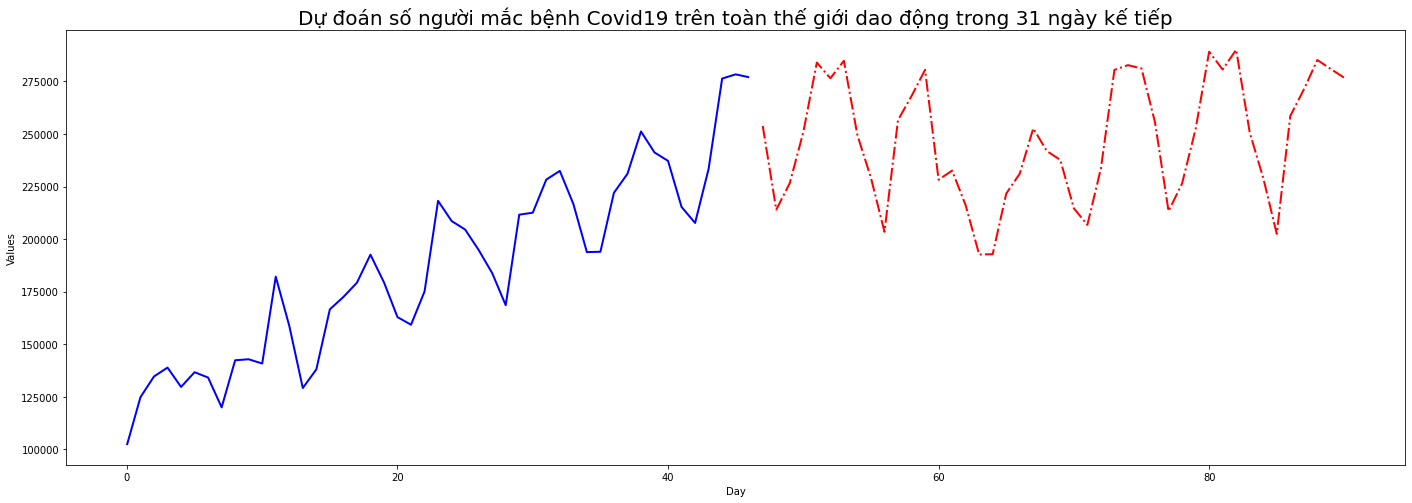

In [272]:
import matplotlib.collections as ml
n_predict=31
look_back=1
for i in range(n_predict):
    forecastY_confirmed = testY_confirmed.reshape(-1, 1)
    Ypredict_confirmed = model.predict(forecastY_confirmed[-look_back:].reshape(1,1,look_back))
    forecastY_confirmed = np.concatenate((forecastY_confirmed, Ypredict_confirmed), axis = 0)
forecastY_confirmed = forecastY_confirmed[-(n_predict+look_back+1):]
inversePredict_confirmed = [forecastY_confirmed[-(n_predict+i):] if i == 0 else forecastY_confirmed[-(n_predict+i):-i] for i in range(look_back+1)]
inversePredict_confirmed = np.concatenate(inversePredict_confirmed, axis = 1)
Ypredict_confirmed = scaler.inverse_transform(inversePredict_confirmed)[:, 0]
date_predict=[i for i in range(data_series_confirmed[train_size_confirmed:].index[-1].day+1,data_series_confirmed[train_size_confirmed:].index[-1].day+n_predict+1)]
series_confirmed = pd.DataFrame(data={'Ngày':date_predict,'Giá trị dự đoán':Ypredict_confirmed})
print(series_confirmed)
Ymerge_confirmed = np.concatenate((testPredictInv_confirmed, Ypredict_confirmed))
Ygraph_confirmed = np.concatenate((np.arange(Ymerge_confirmed.shape[0]).reshape(Ymerge_confirmed.shape[0], -1), Ymerge_confirmed.reshape(Ymerge_confirmed.shape[0], -1)), axis = 1)
fig, ax = plt.subplots(figsize = (24, 8))
line_segments_confirmed = ml.LineCollection([Ygraph_confirmed[:47], Ygraph_confirmed[47:]], colors = ['b', 'r'], linestyle = ['solid', 'dashdot'], linewidth = 2)
ax.add_collection(line_segments_confirmed)
ax.autoscale()
ax.set_ylabel('Values')
ax.set_xlabel('Day')
plt.title('Dự đoán số người mắc bệnh Covid19 trên toàn thế giới dao động trong %d ngày kế tiếp'%Ypredict_confirmed.shape[0], fontsize = 20) 

TÀI LIỆU THAM KHẢO

http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/

https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks

https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0

https://blog.chappiebot.com/h%C6%B0%E1%BB%9Bng-d%E1%BA%ABn-chi-ti%E1%BA%BFt-v%E1%BB%81-c%C6%A1-ch%E1%BA%BF-c%E1%BB%A7a-lstm-v%C3%A0-gru-trong-nlp-a1bd9346b209

https://medium.com/datadriveninvestor/how-do-lstm-networks-solve-the-problem-of-vanishing-gradients-a6784971a577

https://github.com/phamdinhkhanh/LSTM/blob/master/LSTMv2.ipynb?fbclid=IwAR36ZdrTo4cmyaOoIobl4j8PelU7SyoaVFwOwF9QpPPigp16GaHXXlXwgzU

https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/